Script for t-SNE Plot of Most Biased Job Descriptions in Word Embeddings Anlaysis of Australian Job Descriptions 

In [1]:
""" Load Packages """

import cython 
from gensim.models import phrases 
from gensim import corpora, models, similarities #calc all similarities at once, from http://radimrehurek.com/gensim/tut3.html
from sklearn.metrics.pairwise import cosine_similarity
from scipy import spatial
from statistics import mean
from gensim.models import Word2Vec, KeyedVectors
import pandas as pd
from string import ascii_letters, digits
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
from gensim.test.utils import datapath

In [3]:
""" Define plot """

def tsne_plot(words, vectors, iterations, seed, title): 
    "Creates and TSNE model and plots it"
    tsne_model = TSNE(perplexity=5, n_components=2, init='pca', n_iter=iterations, random_state=seed) #you may need to tune these, epsecially the perplexity. #Use PCA to reduce dimensionality to 2-D, an "X" and a "Y 
    new_values = tsne_model.fit_transform(vectors)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(10, 10)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(words[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.ylabel("Latent Dimension 1") 
    plt.xlabel("Latent Dimension 2")
    plt.title(title)
    plt.show()

In [4]:
""" Define Word2Vec model """

w2vmodel = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True, limit=500000)

Plotting the most biased occupations in the data

In [5]:
""" Manually define words which vectors we want to plot """ 

my_word_list=[]
my_word_vectors=[]
label=[]

words_to_explore= ['man', 'woman','midwife', 'nurse', 'teacher', 'social worker', 
'lecturer', 'clerk', 'librarian', 'carer', 'registered nurse', 'doctor',  'electrician', 
'plumber', 'welder', 'tiler', 'personal trainer', 'cabinetmaker', 'labourer', 'joiner', 
'carpenter', 'bricklayer']
for i in words_to_explore:   
    try:
        if my_word_list not in my_word_list:
            my_word_vectors.append(w2vmodel[i])
            my_word_list.append(i)
    except KeyError: 
        continue

c:\Users\kilda\OneDrive\THESIS\Scripts\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\kilda\OneDrive\THESIS\Scripts\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


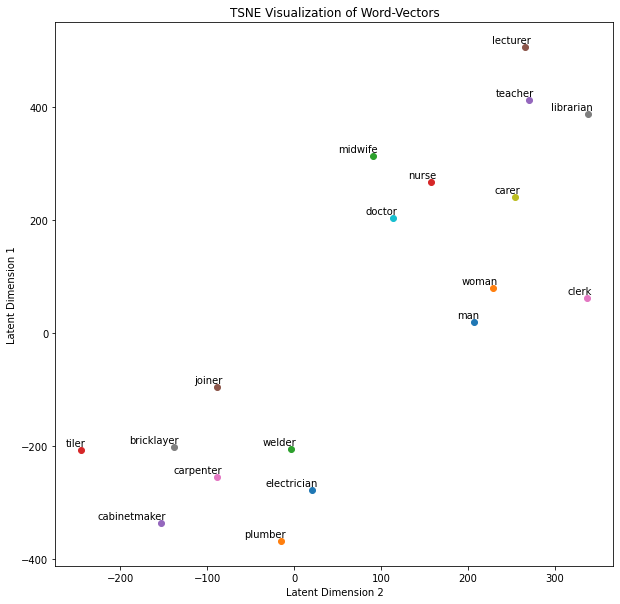

In [6]:
""" Generate plot """
tsne_plot(my_word_list, my_word_vectors, 3000, 23, "TSNE Visualization of Word-Vectors")